In [243]:
import numpy as np
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import sklearn.metrics as sk
from sklearn.model_selection import cross_val_score 
import seaborn as sns

In [244]:
boston_data=load_boston()

#Create Pandas Data frame out of data,add output column and remove outliers
boston=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston['MEDV']=boston_data.target
z = np.abs(stats.zscore(boston))
print(z)
boston= boston[(z < 5).all(axis=1)]

#check to see the null values in dataset
print(boston.isnull().sum())

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [245]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [246]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.241218,0.488427,-0.055232,0.514082,-0.297705,0.411177,-0.444642,0.747985,0.697184,0.340569,-0.430280,0.578648,-0.428844
ZN,-0.241218,1.000000,-0.532577,-0.043811,-0.515469,0.311977,-0.568527,0.663955,-0.309200,-0.311832,-0.389925,0.174144,-0.412207,0.358367
INDUS,0.488427,-0.532577,1.000000,0.065434,0.762246,-0.392014,0.641788,-0.705473,0.590617,0.718034,0.379261,-0.354966,0.602837,-0.478427
CHAS,-0.055232,-0.043811,0.065434,1.000000,0.093554,0.090902,0.089210,-0.102042,-0.003803,-0.032576,-0.120110,0.046444,-0.052602,0.173741
NOX,0.514082,-0.515469,0.762246,0.093554,1.000000,-0.302406,0.729874,-0.767896,0.608359,0.665619,0.184247,-0.383520,0.588484,-0.421394
RM,-0.297705,0.311977,-0.392014,0.090902,-0.302406,1.000000,-0.238897,0.204400,-0.209015,-0.292134,-0.355519,0.122403,-0.615945,0.699539
AGE,0.411177,-0.568527,0.641788,0.089210,0.729874,-0.238897,1.000000,-0.745679,0.449115,0.500593,0.256594,-0.267030,0.601338,-0.370064
DIS,-0.444642,0.663955,-0.705473,-0.102042,-0.767896,0.204400,-0.745679,1.000000,-0.487908,-0.528637,-0.227161,0.287175,-0.495242,0.241130
RAD,0.747985,-0.309200,0.590617,-0.003803,0.608359,-0.209015,0.449115,-0.487908,1.000000,0.908435,0.460336,-0.439364,0.486490,-0.370414
TAX,0.697184,-0.311832,0.718034,-0.032576,0.665619,-0.292134,0.500593,-0.528637,0.908435,1.000000,0.456470,-0.437765,0.542473,-0.459718


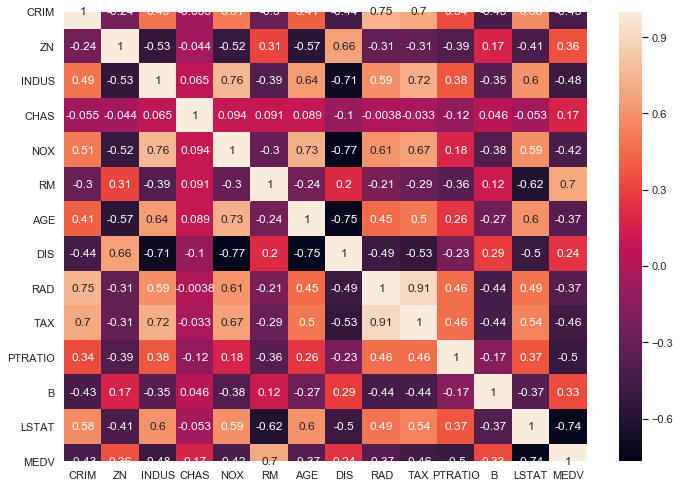

In [287]:
ax=sns.heatmap(boston.corr(),annot=True)

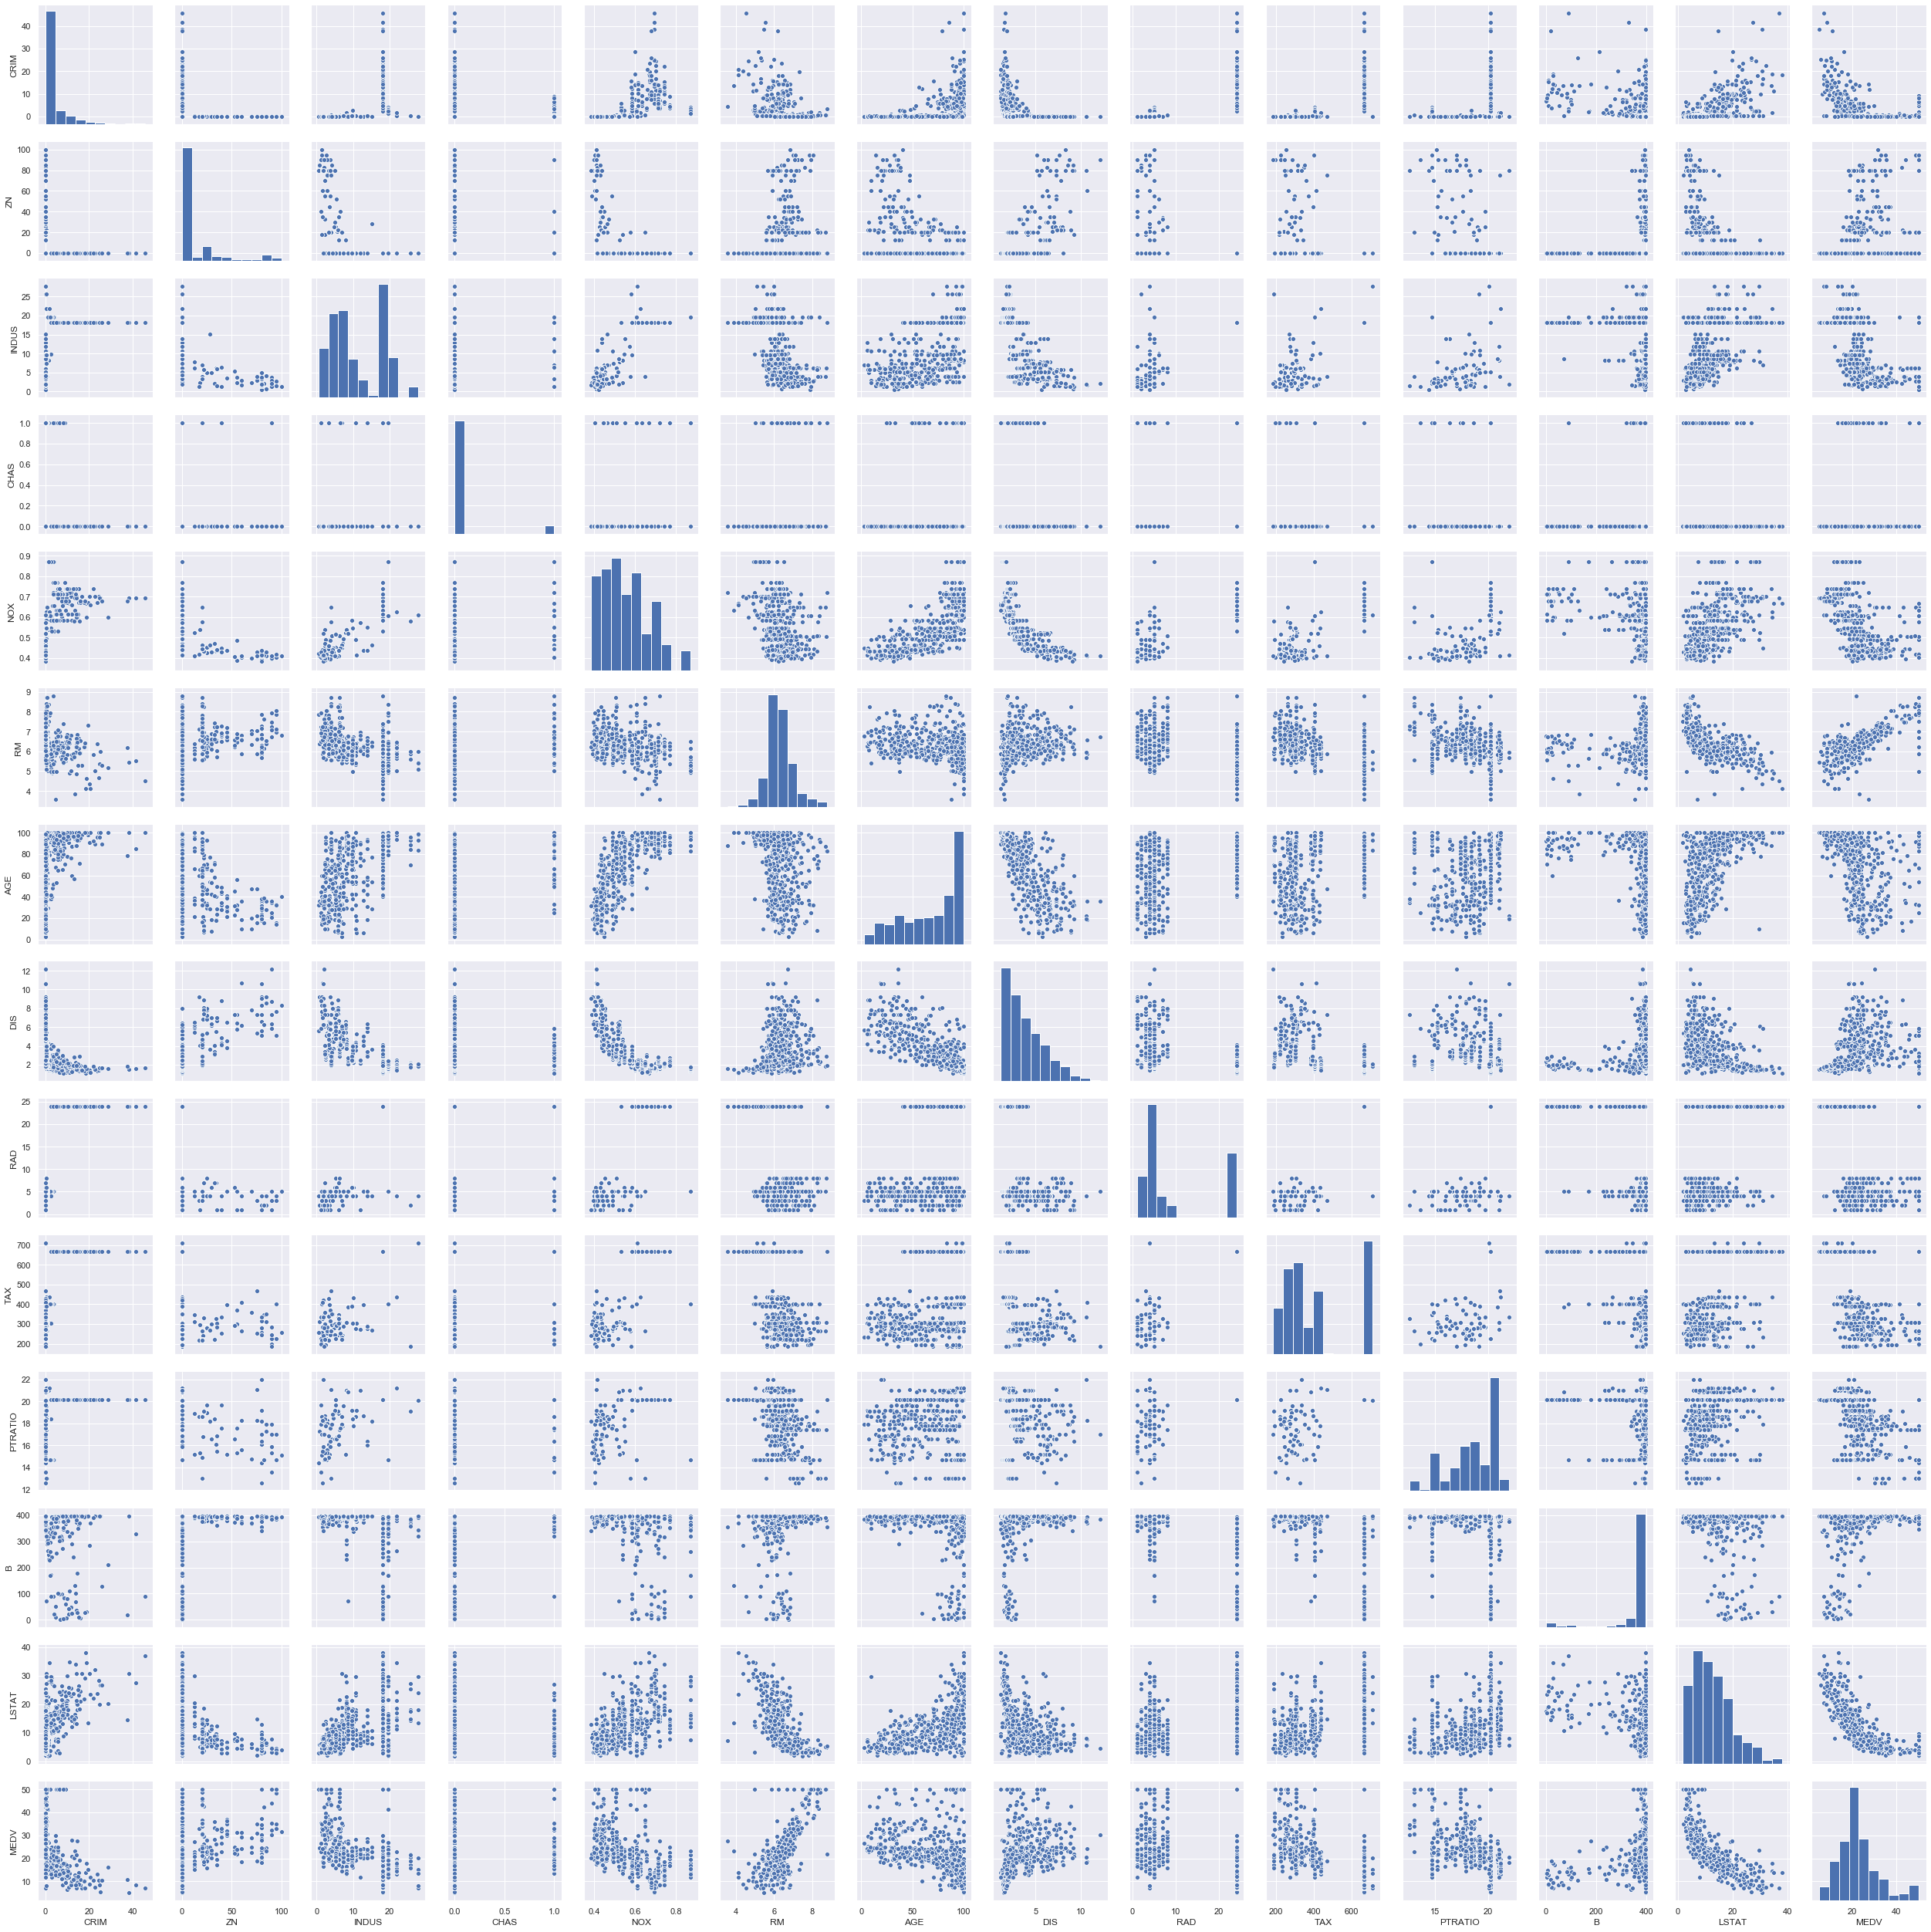

In [248]:
sns.pairplot(boston)

In [249]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [286]:

features=['LSTAT','RM','PTRATIO']
target=boston['MEDV']

#create the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns =['LSTAT','RM','PTRATIO'])
Y = boston['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=5)

In [276]:
#make the features polynomial
poly_features = PolynomialFeatures(degree=5)

# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
# fit the transformed features to Linear Regression
from sklearn.linear_model import Lasso
poly_model = Lasso(alpha=0.09)
poly_model.fit(X_train_poly, Y_train)
#poly_model = LinearRegression()
#poly_model.fit(X_train_poly, Y_train)

Lasso(alpha=0.09, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [277]:
# predicting on training data-set

y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)


In [278]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train*100))
print("R2 score of training set is {}".format(r2_train*100))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test*100))
print("R2 score of test set is {}".format(r2_test*100))
plt.show()

The model performance for the training set
-------------------------------------------
RMSE of training set is 402.7325620491432
R2 score of training set is 79.74408627632738


The model performance for the test set
-------------------------------------------
RMSE of test set is 353.5734002555105
R2 score of test set is 89.06452344351926


In [279]:
Testingscore=poly_model.score(X_test_poly, Y_test)

In [280]:
Testingscore*100

89.06452344351928

In [281]:
Trainingscore=poly_model.score(X_train_poly, Y_train)

In [282]:
Trainingscore*100

79.74408627632738